# Visualize-Result

#### 請搭配教學影片服用
#### Tutorial video: https://www.youtube.com/watch?v=nhn8B0pM9ls

#### 延伸上一次練習程式碼

In [1]:
#import tensorflow, numpy模組
import tensorflow as tf
import numpy as np

#import matplotlib 資料視覺化模組
import matplotlib.pyplot as plt

In [2]:
#重要!!!!!
#清理顯卡內存
#防止顯卡內存不足報錯&提高速度
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))  

In [3]:
#定義add_layer功能(添加神經層)
#inputs, in_size, out_size, activation_funchion=None激勵函數
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases #y=wx+b
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [4]:
#輸入資料
x_data = np.linspace(-1, 1, 300)[:, np.newaxis] #生成300個區間為[-1,1]的數值, 然後縱向生成一個維度 #維度為一
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

#預留輸入給sess.run()進行訓練
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [5]:
#新增一層神經網路l1(隱藏層)
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
#inputs, in_size, out_size, activation_function
#輸入數據, 輸入數據input data size, 隱藏層神經元數量, 激勵函數

#新增一層輸出層prediction
prediction = add_layer(l1, 10, 1, activation_function=None)
#inputs, in_size, out_size, activation_function
#輸入數據  *來自l1隱藏層=xs, 輸入數據size  *隱藏層size, 神經元輸出數量, 激勵函數

#評估 prediction值 與 y_data真實值的差別  (y_data輸入=ys)-prediction #方差
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1])) #方差

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) #優化器 #優化函數:梯度下降 #0.1為Learning rate 

init = tf.global_variables_initializer() #初始化/激活所有變量(Variable) #must have if define variable
sess = tf.Session()
sess.run(init)

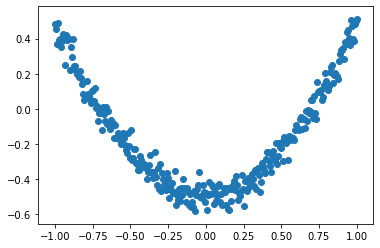

In [6]:
#資料視覺化
fig = plt.figure() #生成一個空白圖片框
ax = fig.add_subplot(1,1,1) #
ax.scatter(x_data, y_data) #真實數據畫圖
#plt.ion #讓生成圖片不會停止，隨資料變動而更新
plt.show() #顯示圖片

0.003122208872810006
50.00310907023959
100.003095717635
150.00308333989233
200.003070771927
250.00305916555226
300.0030479251873
350.00303757889196
400.0030279478524
450.00301888841204
500.0030096464325
550.0030010938644
600.00299323746
650.0029858939815
700.0029779225588
750.0029700202867
800.002962972736
850.0029552865308
900.0029485488776
950.0029425083194


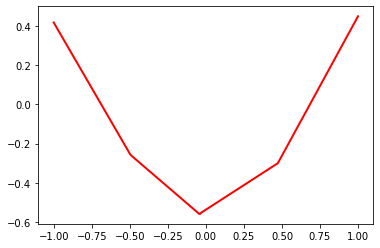

In [9]:
for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data}) #輸入x_data = xs, y_data = ys
    if i % 50 == 0:
        print(i + sess.run(loss, feed_dict={xs: x_data, ys: y_data})) #每50步print loss檢視訓練成效
        
        try:
            ax.lines.remove(lines[0]) #去除lines的第一個單位結果 #讓線段變清晰 
            #放在這裡的原因是剛開始跑的時候，沒有數據也沒有線段，找不到可"處理"的數據/線段，會當機報錯
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data, ys: y_data}) #計算prediction預測結果
        #資料視覺化
        lines = ax.plot(x_data, prediction_value, 'r-', lw=2) #利用x_data, prediction_value畫圖
                                                              #其中prediction_value以寬度為2的紅色線段畫出來
        #ax.lines.remove(lines[0]) #去除lines的第一個單位結果 #讓線段變清晰
        plt.pause(0.1) #畫每一段線段之間暫停0.1秒 #讓線段變清晰
        #plt.ion #讓生成圖片不會停止，隨資料變動而更新
        if i == 950:
            fig = plt.figure() #生成一個空白圖片框
            ax = fig.add_subplot(1,1,1)
            lines = ax.plot(x_data, prediction_value, 'r-', lw=2)
            plt.show() #顯示圖片